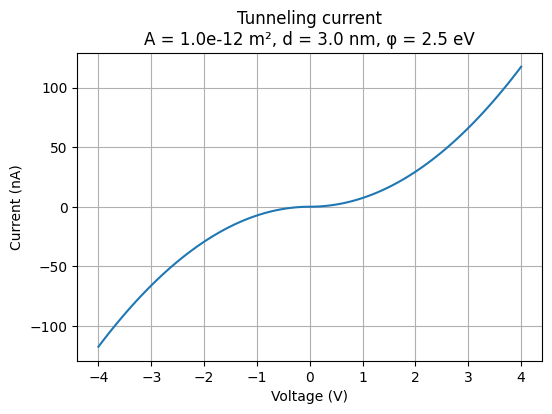

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Physical constants
q = 1.602e-19      # Elementary charge (C)
hbar = 1.055e-34   # Reduced Planck's constant (J*s)
m0 = 9.109e-31     # Electron mass (kg)

# Device and barrier parameters
phi = 2.5          # barrier height in eV
phi_J = phi * q    # barrier height in Joules
d = 3e-9         # barrier thickness (m)
A = 1e-12         # junction area (m^2)
m_eff = 0.2 * m0   # effective electron mass

# Empirical scaling factor
# Based on https://pubs.acs.org/doi/10.1021/acs.nanolett.6b04369#_i1
# https://doi.org/10.1038/s41563-023-01556-7

scaling_factor = 2e13 

V = np.linspace(-4, 4, 101)  # Bias range (V)

def wkb_transmission(phi_J, d, m_eff):
    kappa = np.sqrt(2 * m_eff * phi_J) / hbar
    return np.exp(-2 * kappa * d)

def graphene_tunneling_current(V, phi_J, d, m_eff, A):
    T = wkb_transmission(phi_J, d, m_eff)
    pre = 2e13 * A  # Empirical scaling
    return pre * T * V**2 * np.sign(V)

I = graphene_tunneling_current(V, phi_J, d, m_eff, A)

plt.figure(figsize=(6,4))
plt.plot(V, I*1e9)  # Scale current to nA
plt.xlabel('Voltage (V)')
plt.ylabel('Current (nA)')
plt.title(f'Tunneling current\nA = {A:.1e} m², d = {d*1e9:.1f} nm, φ = {phi} eV')
plt.grid(True)
plt.show()



In [3]:
# afm tip pressure
import numpy as np
pi = np.pi

F_0 = 8*10**-6 #force in N
k_0 = 2 #spring constant in N/m
dx = F_0/ k_0 #displacement in m

k = 10000 #spring constant in N/m
F = k * dx #force in N

r = 0.5*10**-6 #radius in m
P = F / (pi * r**2) #pressure in Pa
P_gpa = P / 1e9 #pressure in GPa
"{:e}".format(P)
print(f'{round(P_gpa, 3)} GPa')

50.93 GPa
